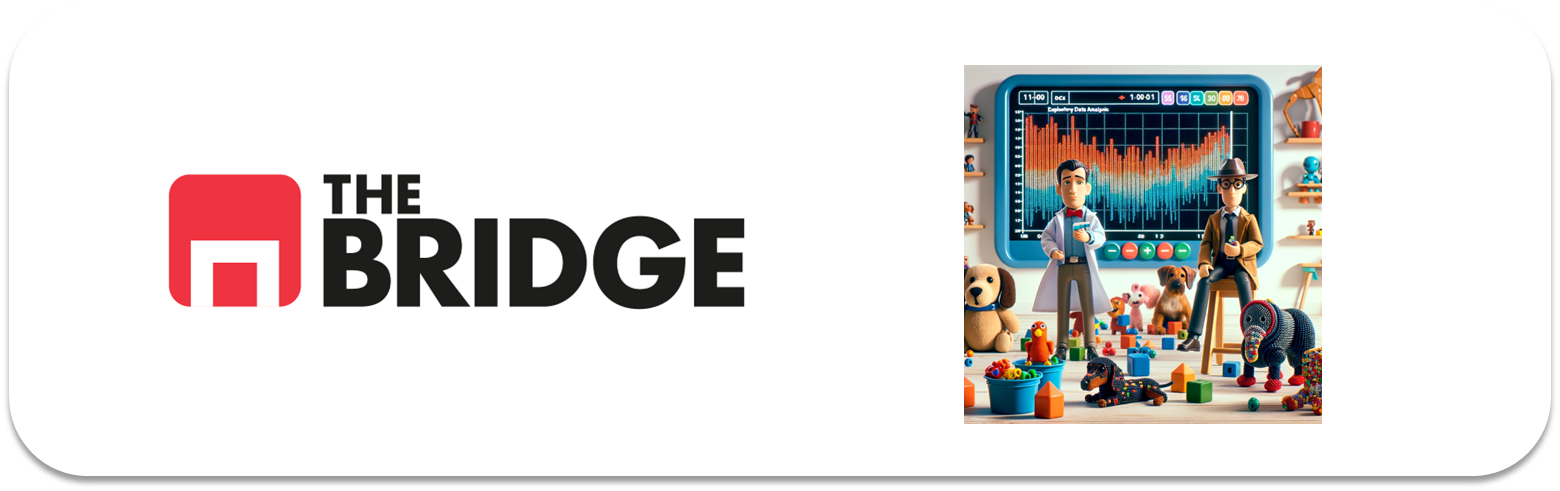

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [11]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [12]:
df_titanic.drop(columns={"deck", "survived", "pclass", "embarked"}, inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [13]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

In [14]:
df_titanic.drop(columns={"parch", "sibsp"}, inplace=True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = df_titanic["embark_town"].mode()[0] # Hay que quedarse con el valor 0 porque devuelve una serie

In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [17]:
df_titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [18]:
df_titanic.age.value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [19]:
condicion_1 = df_titanic["age"].isna()
condicion_2 = df_titanic["who"] == "man"
condicion_3 = df_titanic["who"] == "woman"
condicion_4 = df_titanic["who"] == "child"

df_titanic.loc[condicion_1 & condicion_2, "age"] = df_titanic.loc[condicion_2, "age"].mean()
df_titanic.loc[condicion_1 & condicion_3, "age"] = df_titanic.loc[condicion_3, "age"].mean()
df_titanic.loc[condicion_1 & condicion_4, "age"] = df_titanic.loc[condicion_4, "age"].mean()

In [20]:
df_titanic.age.value_counts()

age
33.173123    124
32.000000     71
24.000000     30
22.000000     27
18.000000     26
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

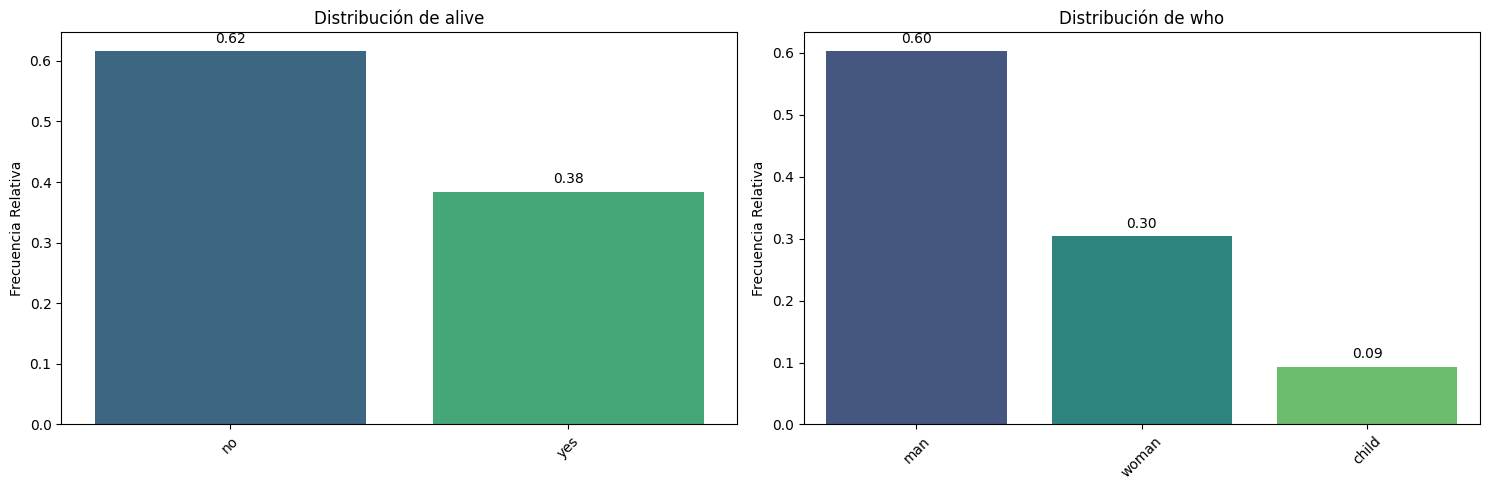

In [114]:
pinta_distribucion_categoricas(df_titanic, ["alive", "who"], mostrar_valores=True, relativa=True)

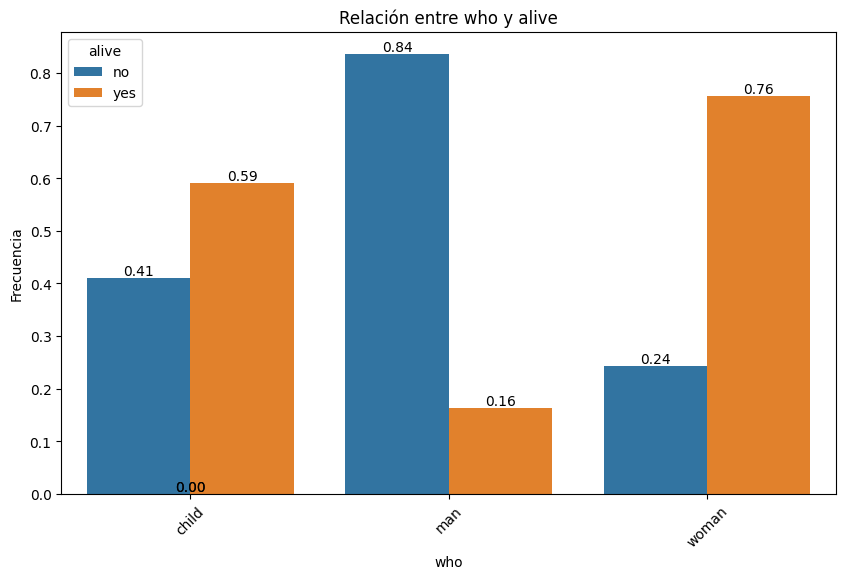

In [22]:
plot_categorical_relationship_fin(df_titanic,  "who", "alive", show_values=True, relative_freq=True)

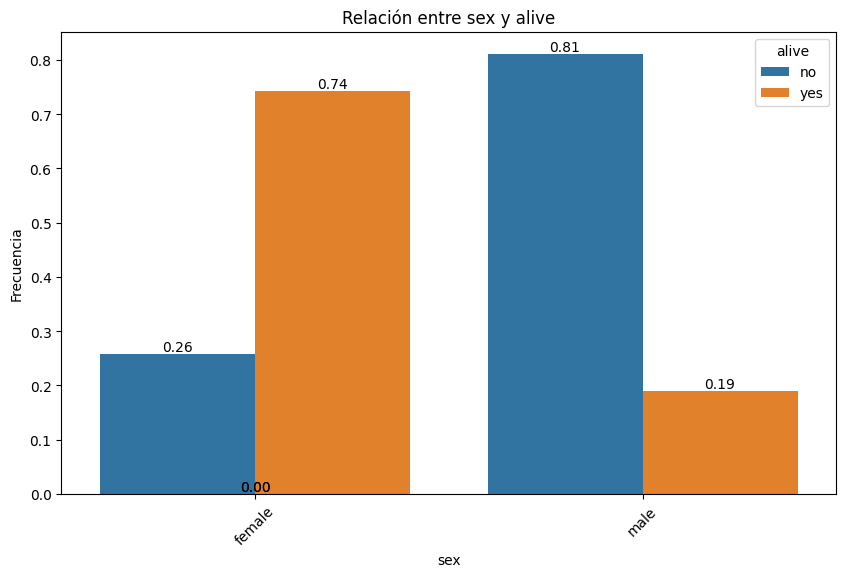

In [23]:
plot_categorical_relationship_fin(df_titanic,  "sex", "alive", show_values=True, relative_freq=True)

In [24]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["sex"])
tabla_contingencia

sex,female,male
alive,,
no,81,468
yes,233,109


In [25]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [115]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["who"])
tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [116]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [26]:
df_titanic["adult"] = True

In [27]:
df_titanic.loc[df_titanic.who == "child", "adult"] = False

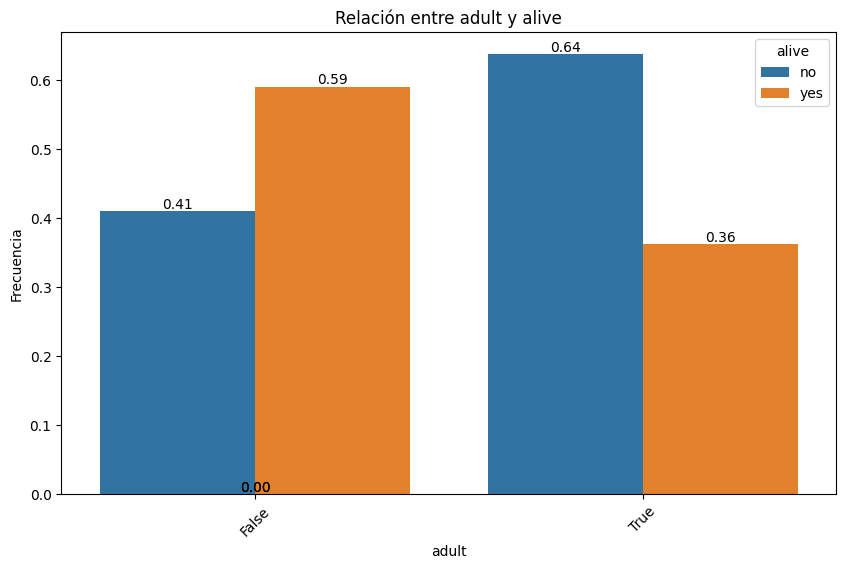

In [28]:
plot_categorical_relationship_fin(df_titanic,  "adult", "alive", show_values=True, relative_freq=True)

In [29]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["adult"])
tabla_contingencia

adult,False,True
alive,,
no,34,515
yes,49,293


In [30]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 497.85858586]
 [ 31.85858586 310.14141414]]


En términos absolutos sobrevivieron más mujeres > hombres > niños, en términos relativos siguen siendo las mujeres las que más sobrevivieron, después los niños y un porcentaje mucho menor de hombres.   
Existe una fuerte relación entre el sexo y la supervivencia, un porcentaje mucho mayor de mujeres que de hombres sobrevivió, ya que hay un valor p muy pequeño, que nos permite descartar la hipótesis de partida, que es que no hay relación.   
Entre ser adulto o niño y la supervivencia también existe una relación, sobrevivió un mayor porcentaje de niños, ya que el grupo más mayoritario eran los hombres adultos y la mayoría murieron, esto hace que aunque la mayoría de las mujeres sobrevivieron el porcentaje de adultos que sobrevivieron sea menor que el de niños. El caso del valor p es el mismo que para sexo y supervivencia (no es el mismo valor pero indica lo mismo)

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

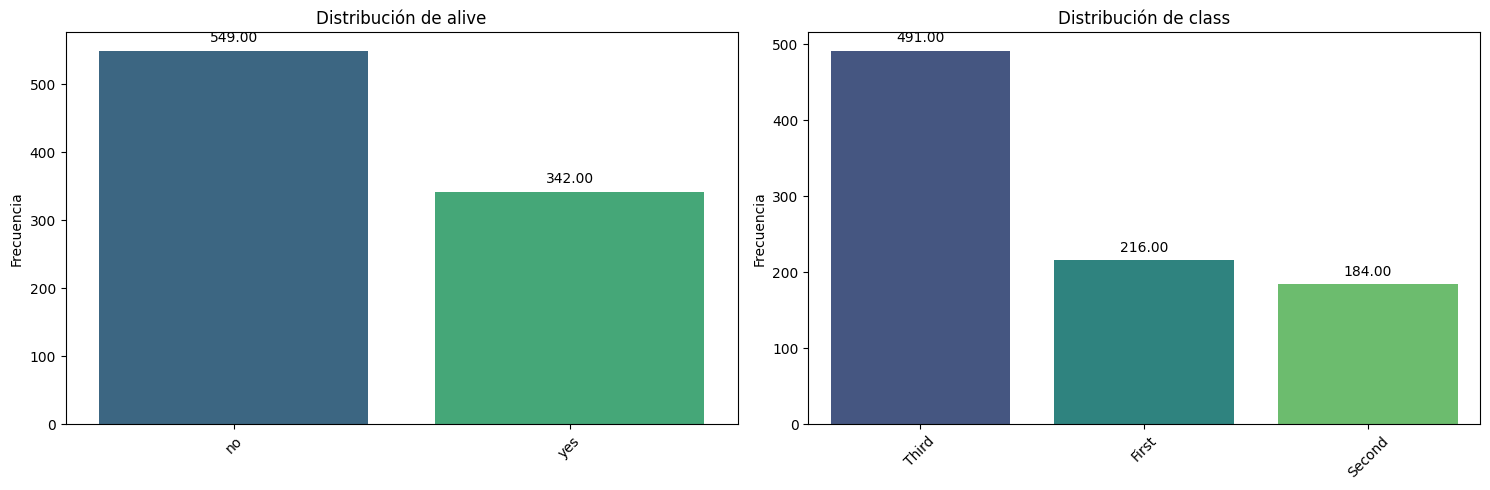

In [31]:
pinta_distribucion_categoricas(df_titanic, ["alive", "class"], mostrar_valores=True)

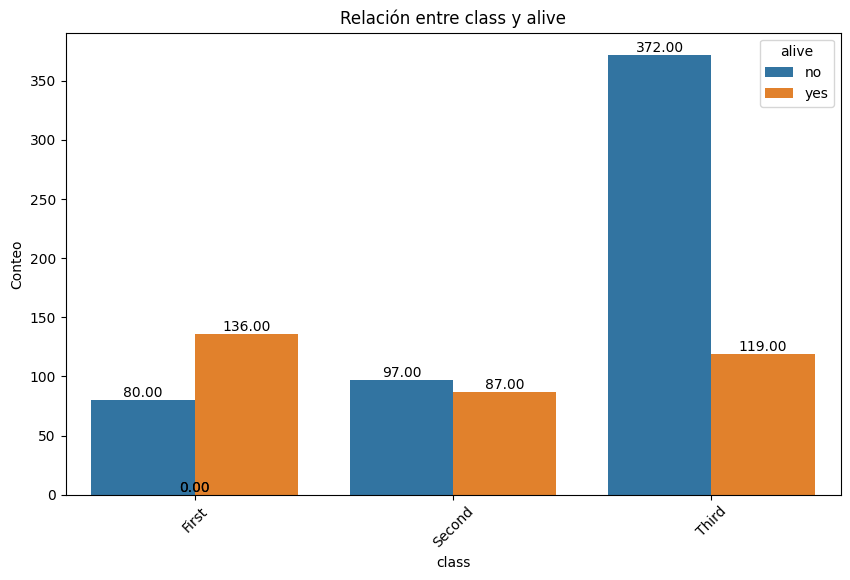

In [117]:
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values=True)

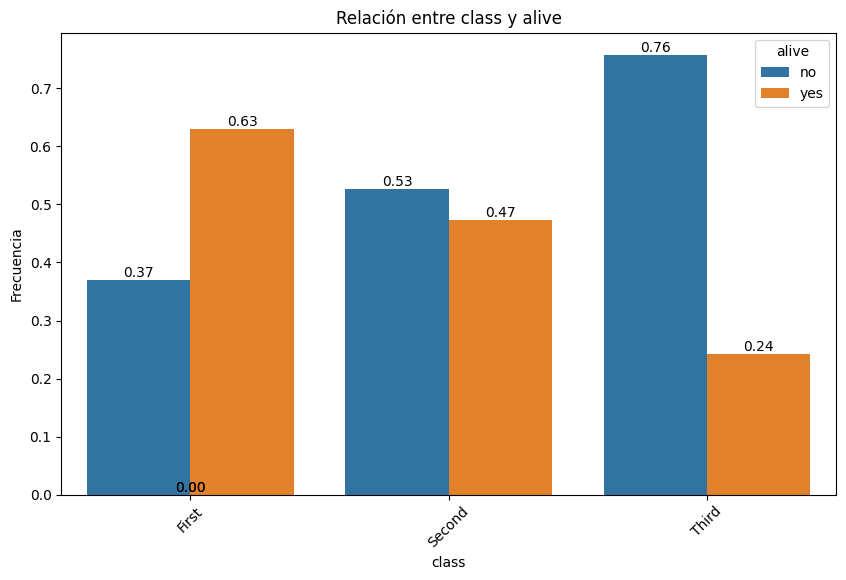

In [32]:
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values=True, relative_freq=True)

In [33]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


En términos absolutos sobrevivieron más pasajeros de primera > tercera > segunda clase, mientras que en términos relativos, como ya podíamos anticipar viendo el gráfico con valores absolutos, fue mucho mayor el porcentaje de personas que sobrevivió que viajaba en primera clase, el de segunda clase es notablemente inferior y el de tercera es mucho menor que los otros dos.   
Estadísticamente, podemos descartar la hipótesis nula (que no hay relación entre variables), ya que el valor p es ínfimo.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

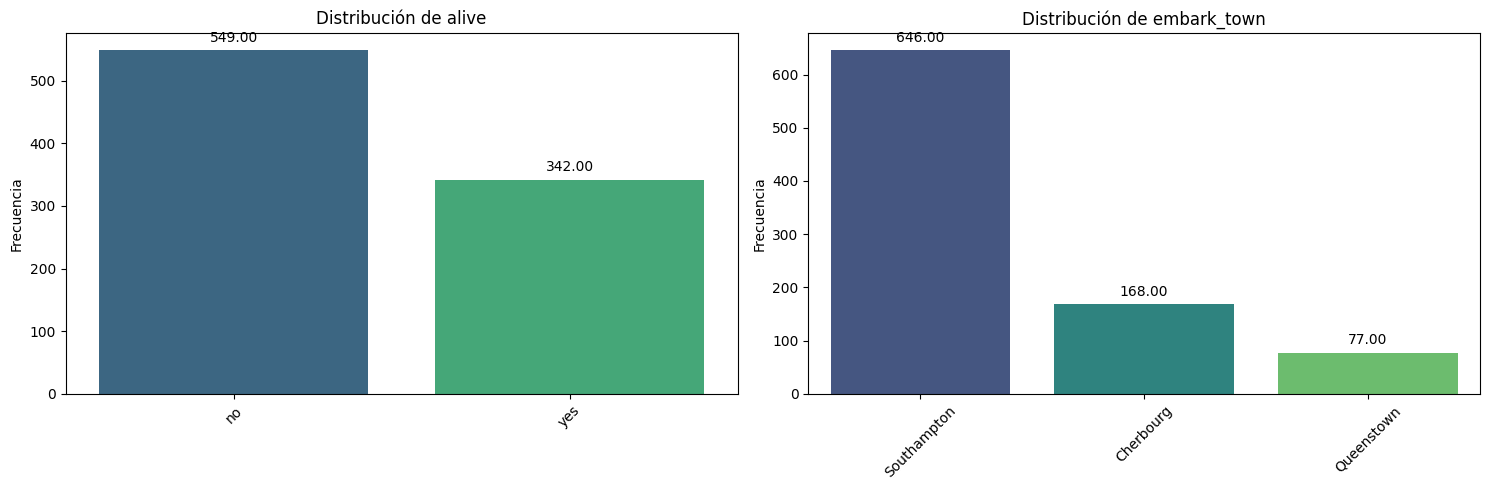

In [34]:
pinta_distribucion_categoricas(df_titanic, ["alive", "embark_town"], mostrar_valores=True)

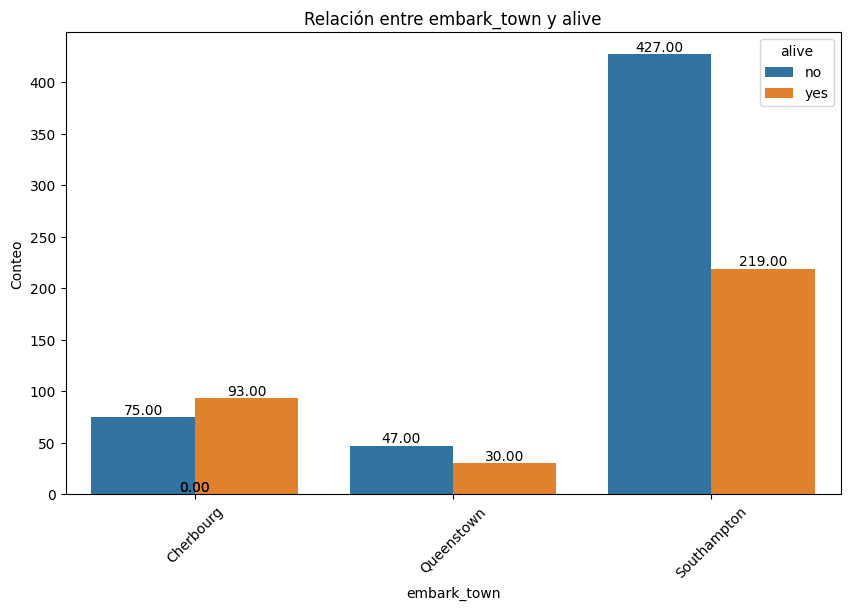

In [118]:
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values=True)

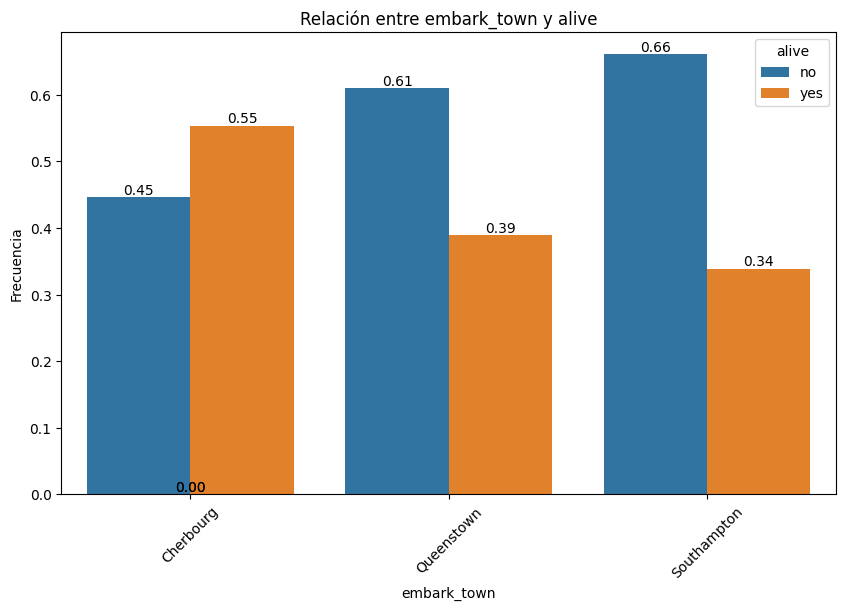

In [35]:
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values=True, relative_freq=True)

In [119]:
tabla_contingencia = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


Sobrevivieron más personas de Southampton en términos absolutos, porque sobrevivieron más personas de Southampton de las que viajaban en las otras dos ciudades, pero en términos relativos sobrevivieron más personas de Cherbourg y de Queenstown y Southampton sobrevivió un porcentaje similar, probablemente embarcó más gente en primera clase en Cherbourg. Estadísticamente hay una relación fuerte entre haber embarcado en una ciudad y haber fallecido o sobrevivido (más de lo que yo esperaba), se ve a simple vista sin realizar ninguna prueba, aun así para cerciorarme calculo su valor p y de nuevo es ínfimo, muy por debajo de 0.05, por lo que descartamos la hipótesis nula de que no tienen relación.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


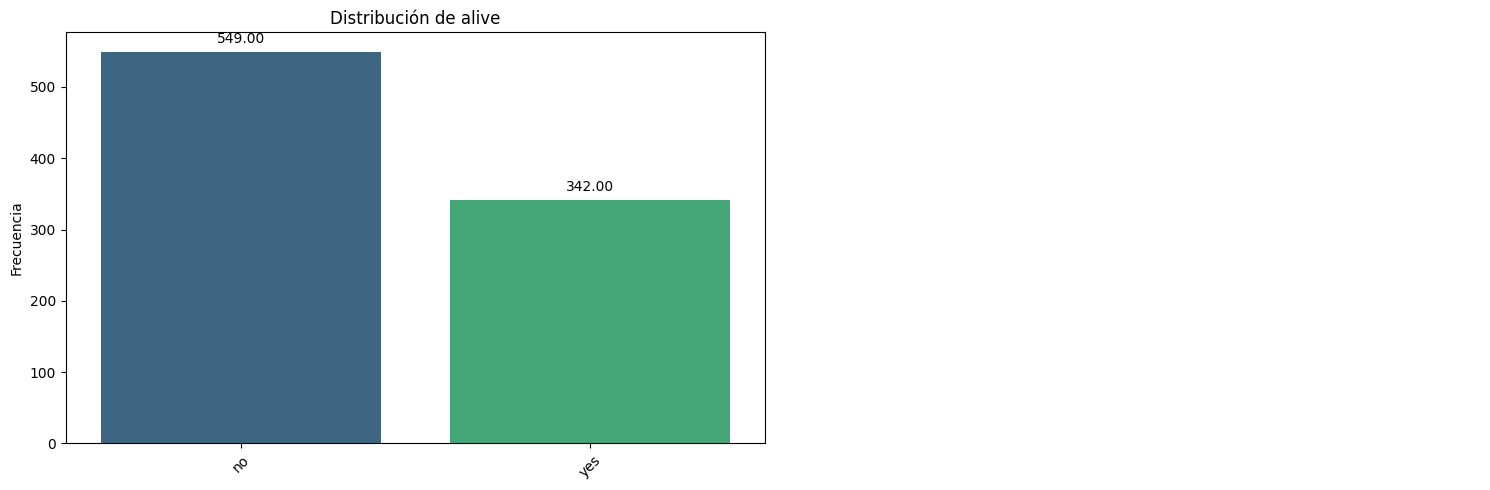

In [37]:
pinta_distribucion_categoricas(df_titanic, ["alive"], mostrar_valores=True)

(2,)


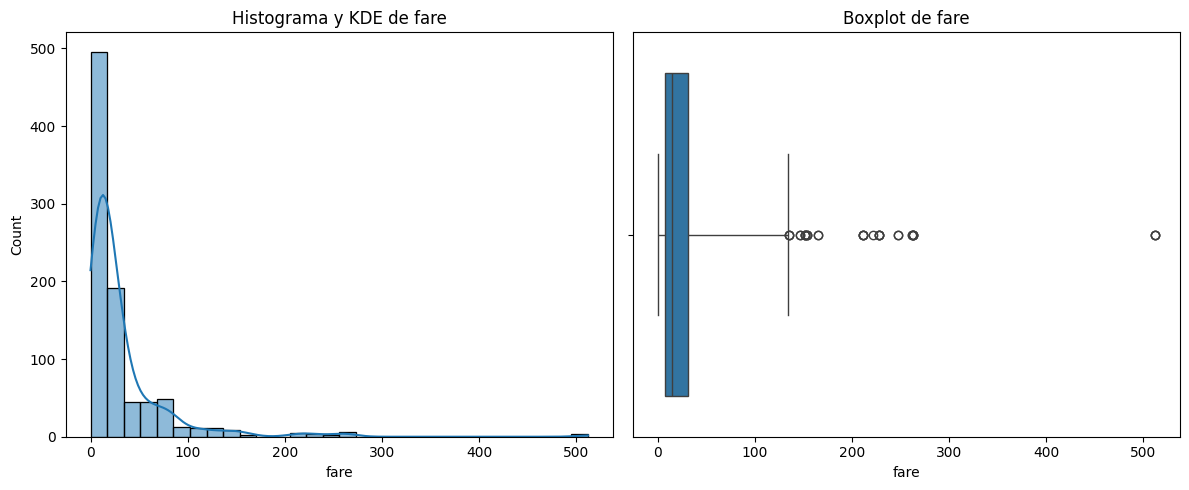

In [38]:
plot_combined_graphs(df_titanic, ["fare"], bins=30, whisker_width=4.5)

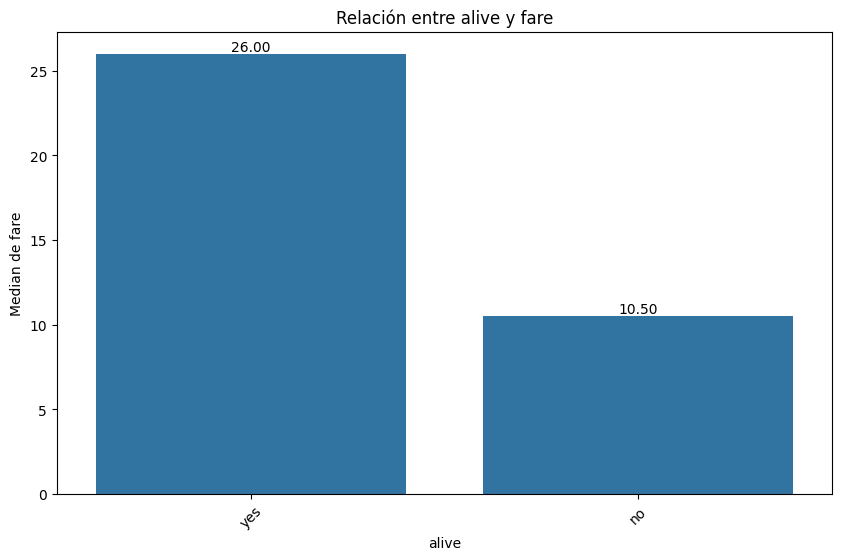

In [39]:
plot_categorical_numerical_relationship(df_titanic, "alive", "fare", show_values=True, measure="median")

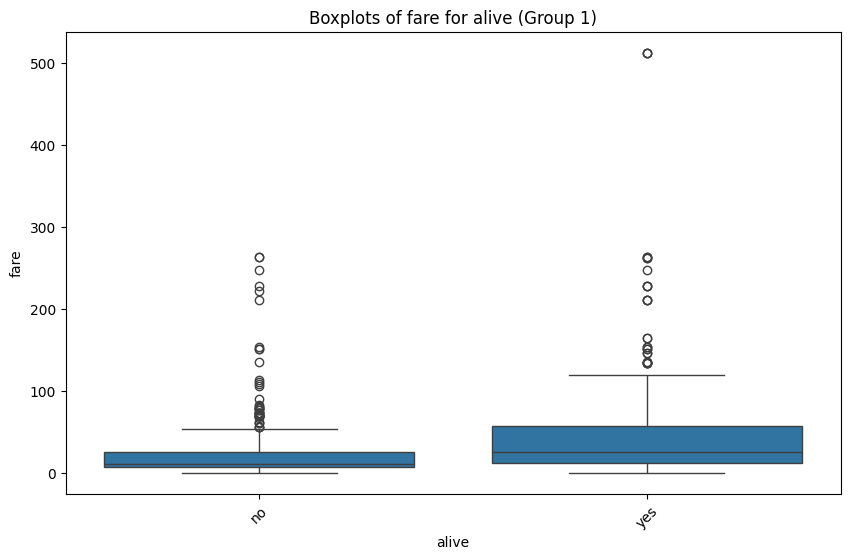

In [40]:
plot_grouped_boxplots(df_titanic, "alive", "fare")

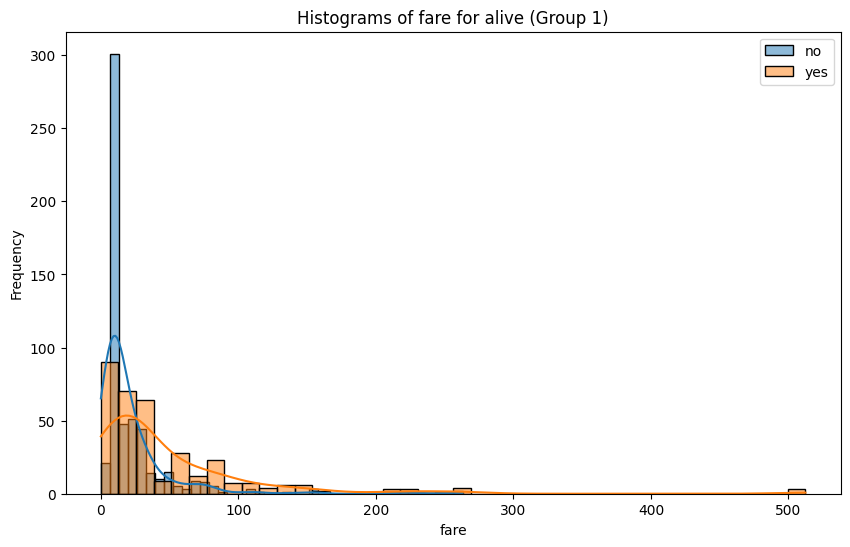

In [41]:
plot_grouped_histograms(df_titanic, "alive", "fare", 2, 40)

In [42]:
from scipy.stats import mannwhitneyu

grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


Podemos observar que hay una clara relación entre la tarifa y la supervivencia, las personas con tarifas más caras tenían más probabilidades de sobrevivir, en los diagramas de cajas vemos que todos los cuartiles son más altos y también el bigote más largo hacia arriba y los outliers son mayores, además en el histograma combinado vemos que hay una acumulación mucho mayor en los billetes más baratos de las personas que fallecieron, mientras que el valor de los billetes de las personas que sobrevivieron está mucho más repartido. Ya podríamos imaginarnos esta relación, si presuponemos que el precio va ligado a la clase. De todas formas aplicamos el test U de Mann_Whitney para asegurarnos y vemos que podemos descartar la hipótesis de partida de que no hay relación porque el valor p es muy pequeño.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


(2,)


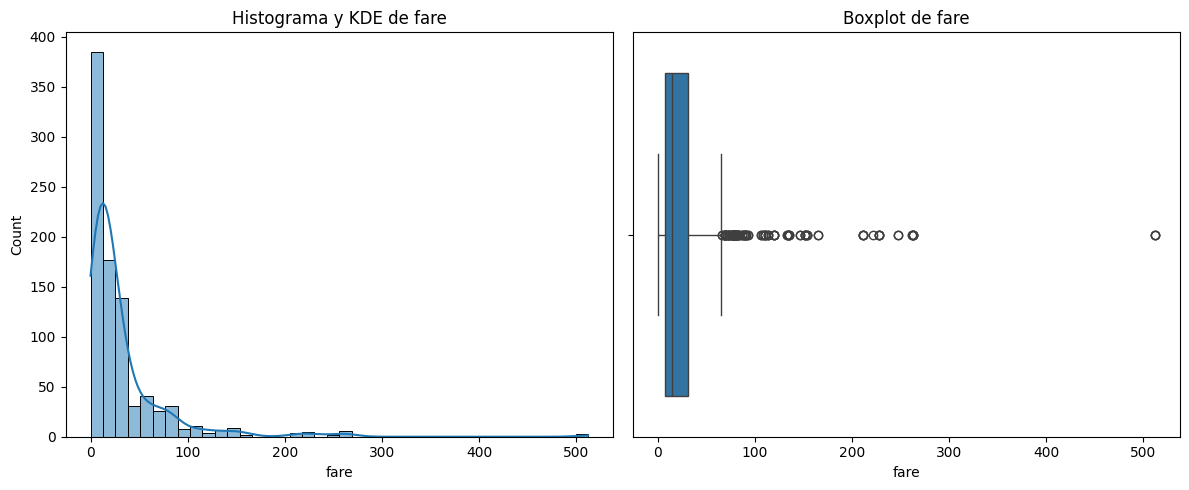

In [43]:
plot_combined_graphs(df_titanic, ["fare"], bins=40)

In [44]:
df_titanic.fare.value_counts()[0]

np.int64(15)

In [45]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0,True
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,True
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0,True
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0,True
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0,True
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0,True


In [46]:
df_titanic.loc[df_titanic.fare.argmax()]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
adult                  True
Name: 258, dtype: object

Existen 15 pasajeros que no pagaron el billete, probablemente serían los miembros de la tripulación y trabajadores del barco, ya que son todos hombres en edad de trabajar (o desconocida, pero hombres), todos viajaban solos y todos embarcaron en Southampton.   
La persona que compró el billete más caro era una mujer que viajaba sola, probablemente cogió el camarote más lujoso.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.



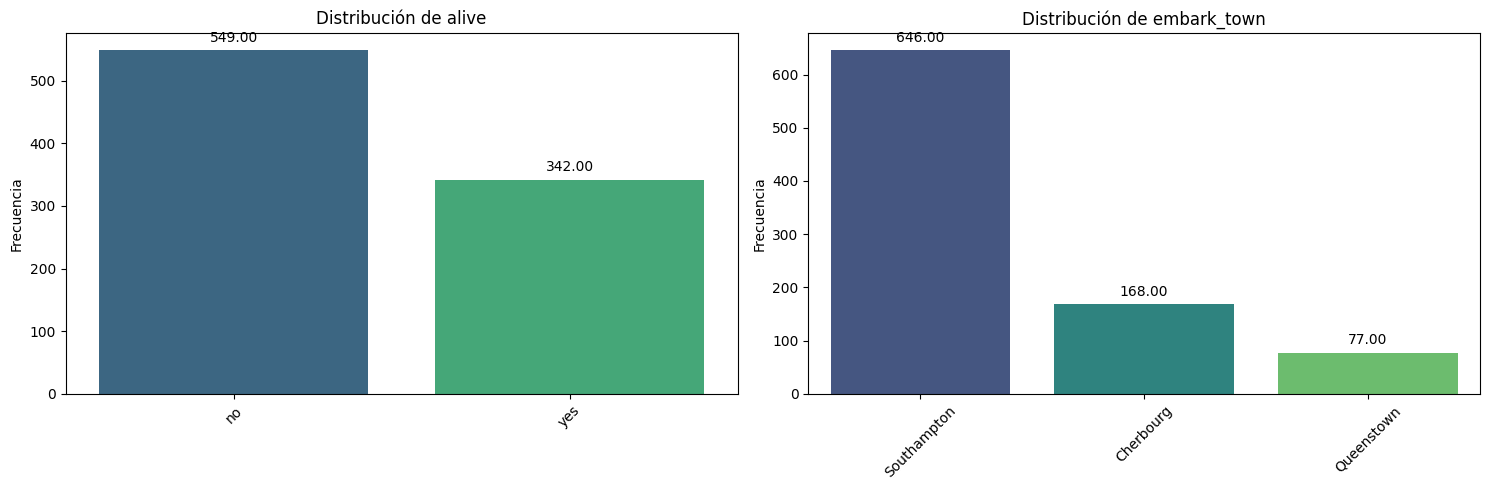

In [47]:
pinta_distribucion_categoricas(df_titanic, ["alive", "embark_town"], mostrar_valores=True)

(2,)


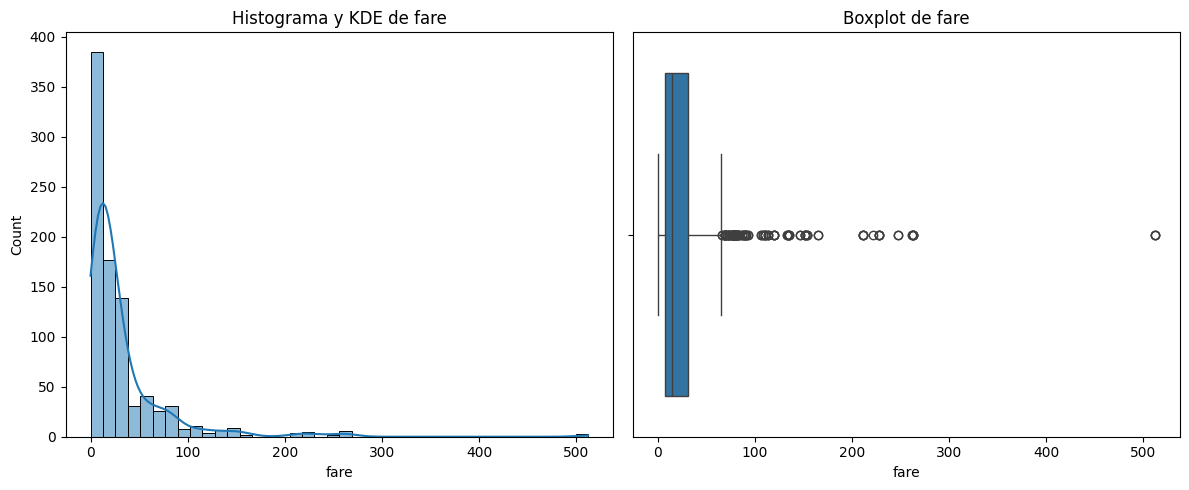

In [48]:
plot_combined_graphs(df_titanic, ["fare"], bins=40)

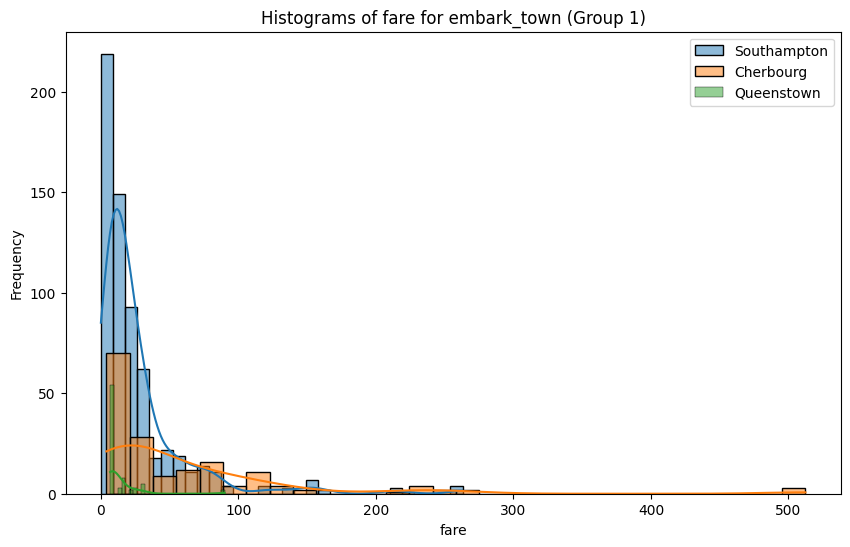

In [55]:
plot_grouped_histograms(df_titanic, "embark_town", "fare", 3, 30)

In [49]:
col_directora = "alive"
col_1 = "embark_town"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor, [col_1,col_2]]

Respuesta no:


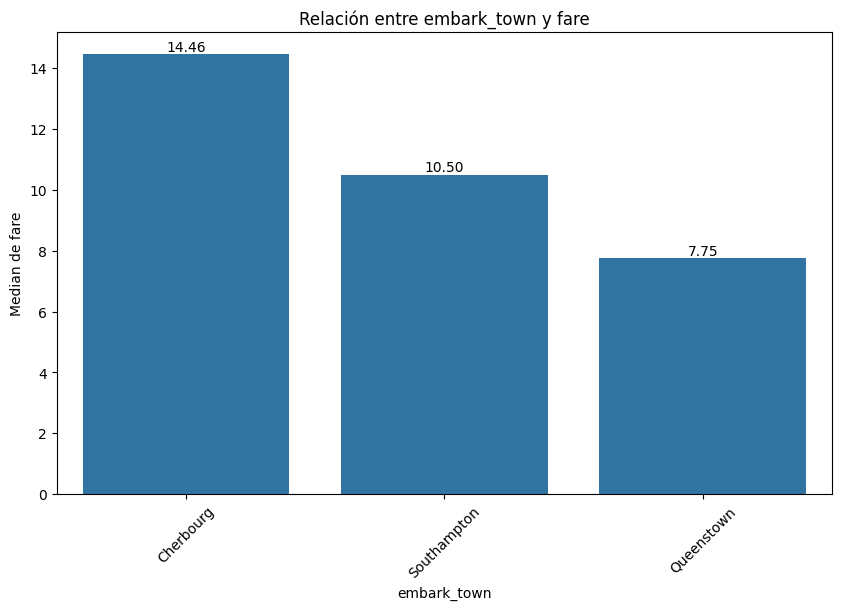

Respuesta yes:


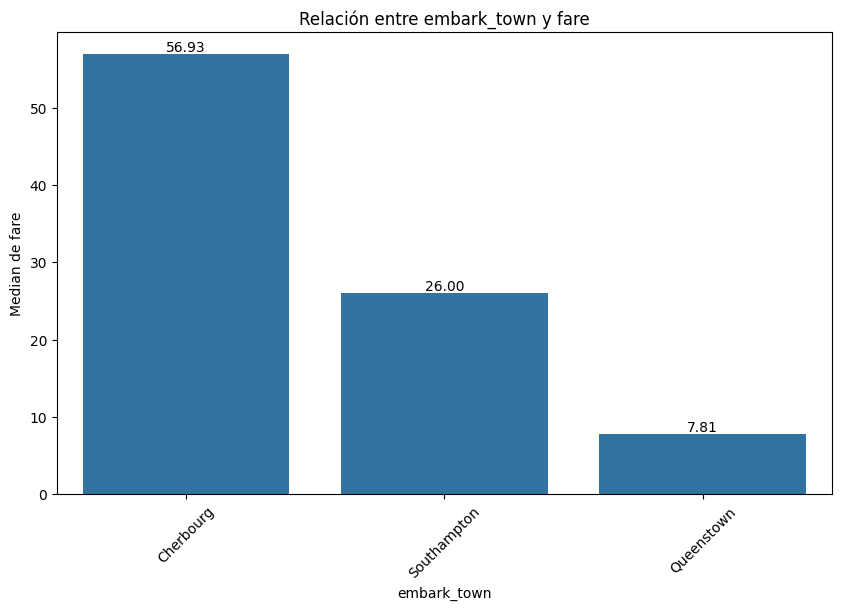

In [50]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_numerical_relationship(df_datos,col_1,col_2, show_values=True, measure="median")

Respuesta no:


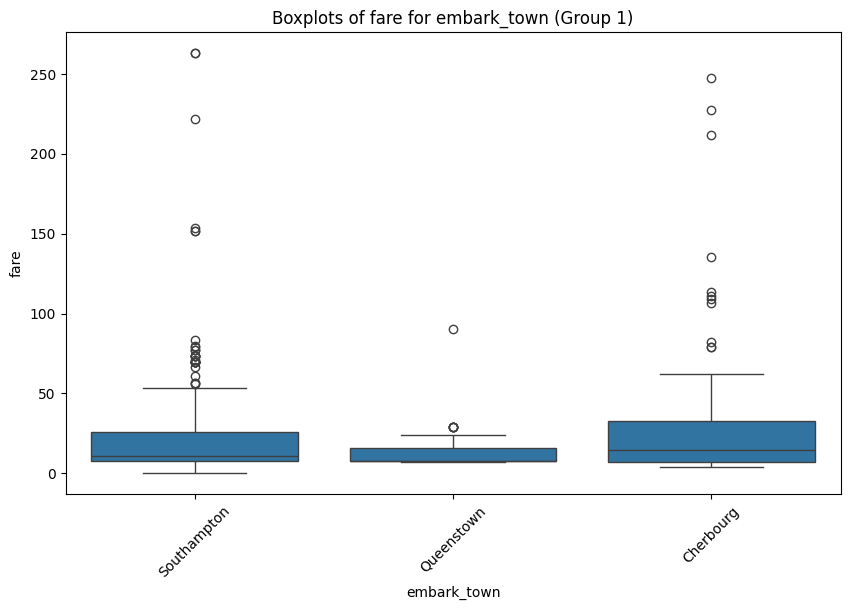

Respuesta yes:


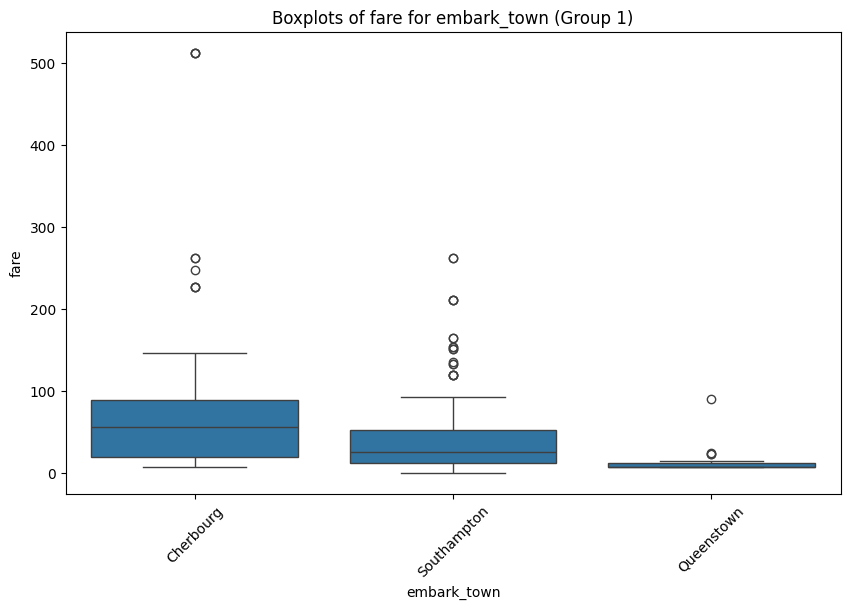

In [51]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_boxplots(df_datos,col_1,col_2)

Respuesta no:


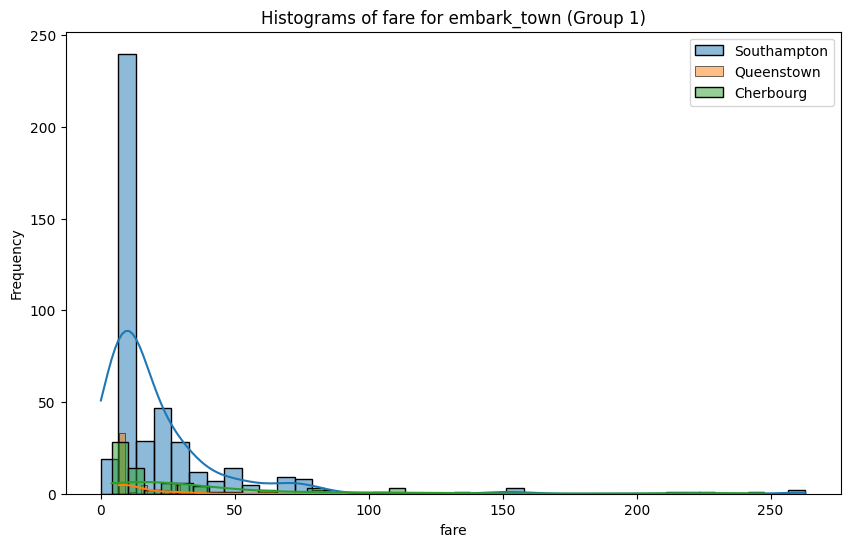

Respuesta yes:


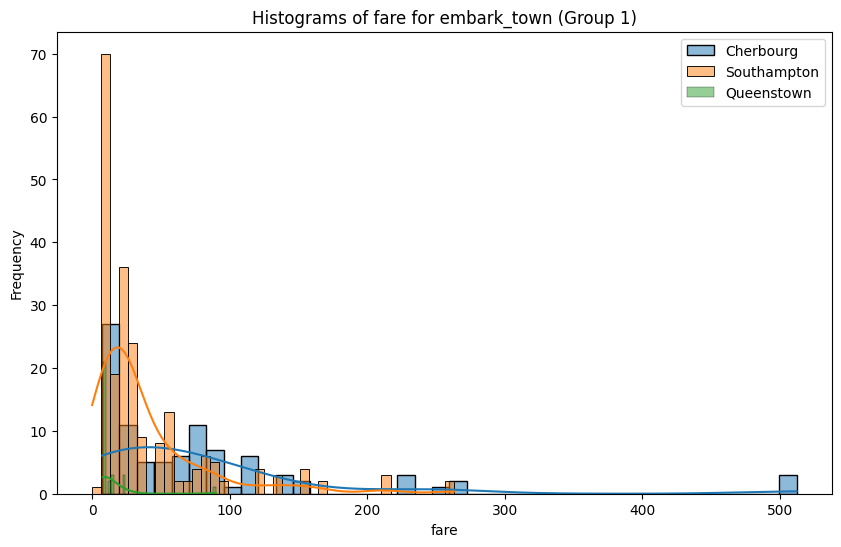

In [52]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2, 3, bins=40)

In [53]:
df_titanic.describe()

,age,fare,family_members
count,891.000000,891.000000,891.000000
mean,30.319458,32.204208,0.904602
std,13.063839,49.693429,1.613459
min,0.420000,0.000000,0.000000
25%,22.000000,7.910400,0.000000
50%,32.000000,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,80.000000,512.329200,10.000000


Observamos que estas tres variables están relacionadas, como ya habíamos visto antes en los análisis bivariable, los viajeros que embarcaron en Cherbourg eran los que más probabilidades de sobrevivir, en concreto los que pagaron unas tarifas más elevadas, como podemos ver por la diferencia entre medianas y demás cuartiles de los viajeros que sobrevivieron y los que no. Este fenómeno se cumple también claramente en Southampton, aunque el porcentaje de pesonas que sobrevivieron fuera mucho menor. En Queenstown, sin embargo, no se observa el mismo fenómeno y tanto la distribución de la gráfica de densidad de probabilidad como la mediana y cuartiles son similares para las personas que sobrevivieron como para los que murieron. No es que en Queenstown la supervivencia no tenga relación con las tarifas, sino que el rango de las tarifas es mucho menor y por eso para ambos grupos son valores de tarifa muy bajos, todos viajaban en condiciones similares.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [81]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,True
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,True
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,True
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,True
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0,True
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,True
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3,True
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0,True


In [90]:
df_titanic.groupby(["class", "age", "alive"], as_index=False)["alone"].count().sort_values(by= "alone", ascending=False)

,class,age,alive,alone
235,Third,33.173123,no,85
232,Third,32.000000,yes,30
231,Third,32.000000,no,24
35,First,33.173123,no,16
208,Third,22.000000,no,15
...,...,...,...,...
265,Third,61.000000,no,1
266,Third,63.000000,yes,1
267,Third,65.000000,no,1
268,Third,70.500000,no,1


In [101]:
df_titanic_clase_edad = df_titanic.groupby(["class", "age", "alive"], as_index=False)["alone"].count().sort_values(by= "alone", ascending=False)

In [100]:
df_titanic_clase_edad["total"] = 0

In [102]:

for clase in df_titanic_clase_edad["class"].unique():
    for edad in df_titanic_clase_edad["age"].unique():
        df_titanic_clase_edad.loc[(df_titanic_clase_edad["age"] == edad) & (df_titanic_clase_edad["class"] == clase), "total"] = df_titanic_clase_edad.loc[(df_titanic_clase_edad["age"] == edad) & (df_titanic_clase_edad["class"] == clase), "alone"].sum()

In [110]:
df_titanic_clase_edad["%_supervivencia"] = df_titanic_clase_edad.alone / df_titanic_clase_edad.total * 100
df_titanic_clase_edad.rename(columns={"alone": "total_vivos"}, inplace=True)

In [113]:
df_titanic_clase_edad.loc[df_titanic_clase_edad["alive"] == "yes"].sort_values(by="%_supervivencia", ascending = False).head(20)

,class,age,alive,total_vivos,total,%_supervivencia
32,First,32.00,yes,11,11.0,100.0
38,First,35.00,yes,9,9.0,100.0
61,First,48.00,yes,5,5.0,100.0
7,First,17.00,yes,3,3.0,100.0
92,Second,2.00,yes,2,2.0,100.0
151,Second,45.00,yes,2,2.0,100.0
102,Second,17.00,yes,2,2.0,100.0
109,Second,22.00,yes,2,2.0,100.0
91,Second,1.00,yes,2,2.0,100.0
6,First,16.00,yes,3,3.0,100.0


En términos absolutos las personas que más sobrevivieron fueron las personas de 32 años, que viajaban en 3ª clase (30), en términos relativos hubo varios grupos, pero el más numeroso las personas de 32 años que viajaban en 1ª clase (11 personas con 100% supervivencia), los dos grupos con la supervivencia más alta son de personas de 32 años porque es la media de edad de las mujeres, el grupo que más sobrevivió y fue este el valor que usamos para sustituir los nulos.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [58]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")

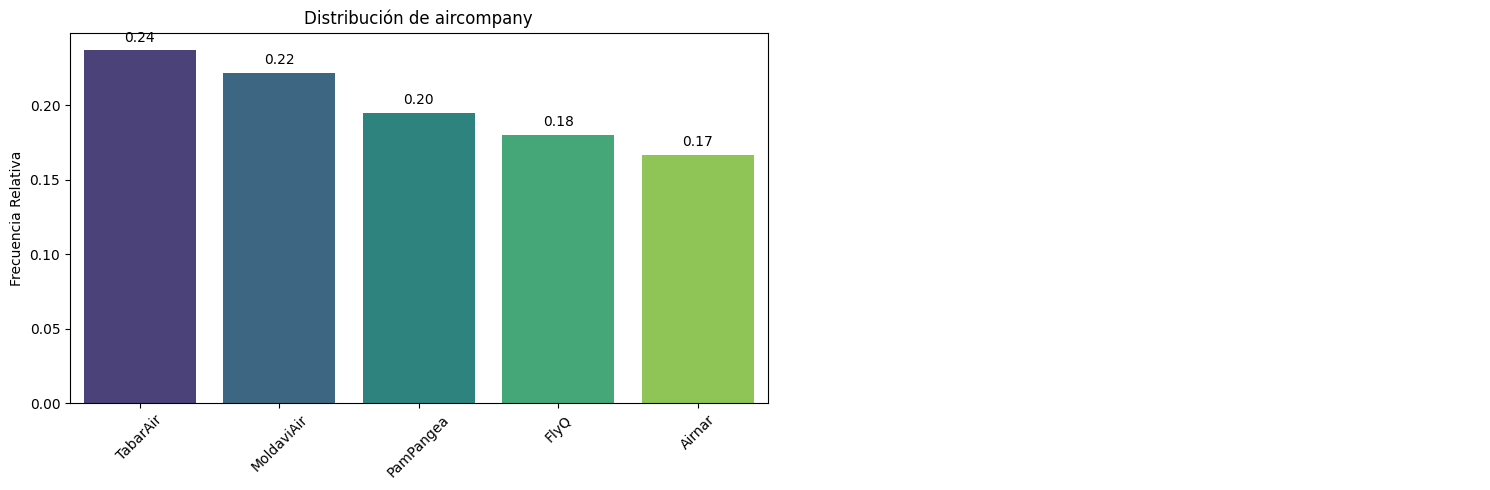

In [59]:
pinta_distribucion_categoricas(df_air_jun, ["aircompany"], relativa=True, mostrar_valores=True)

(2,)


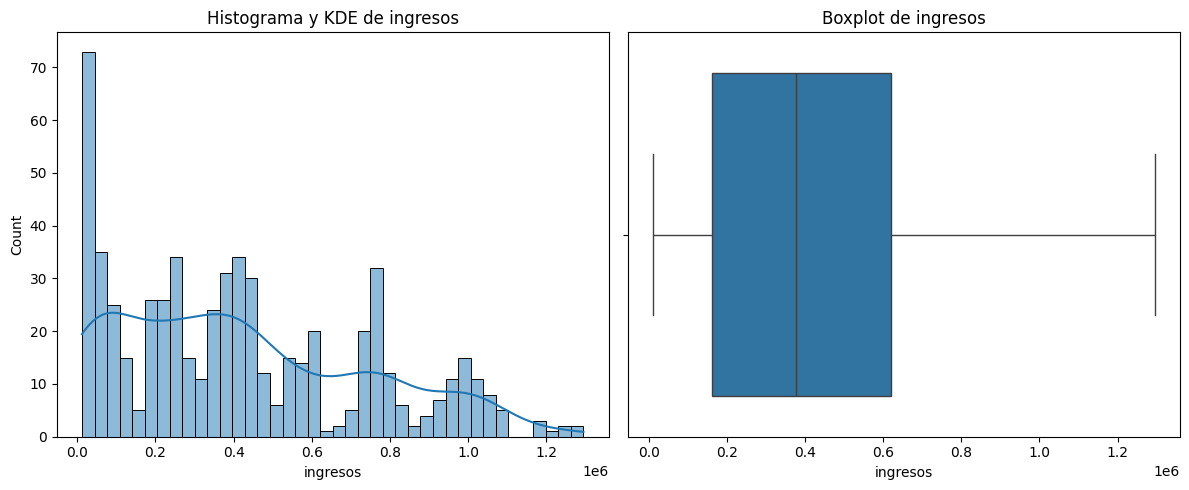

In [60]:
plot_combined_graphs(df_air_jun, ["ingresos"], bins=40)

In [61]:
df_air_jun.describe()

,distancia,consumo_kg,duracion,ingresos
count,600.000000,600.000000,600.000000,6.000000e+02
mean,8071.003333,68240.520508,635.873333,4.187689e+05
std,5550.244086,67441.849592,450.474786,3.182858e+05
min,344.000000,835.920000,42.000000,1.179785e+04
25%,3073.000000,15733.520400,224.000000,1.627668e+05
50%,6877.000000,36033.998000,542.000000,3.754817e+05
75%,12553.000000,111717.652800,876.000000,6.188420e+05
max,20029.000000,264876.314560,1721.000000,1.295516e+06


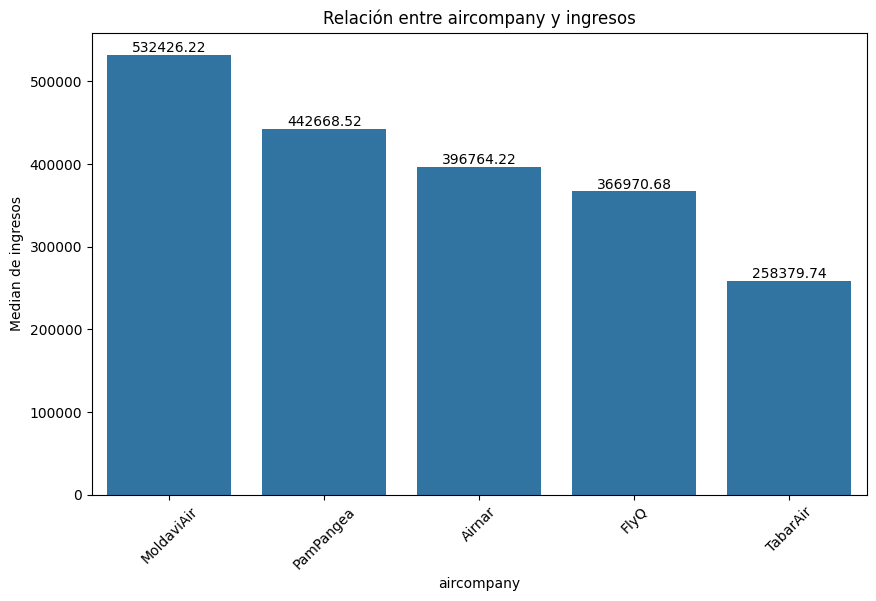

In [62]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany", "ingresos", show_values=True, measure="median")

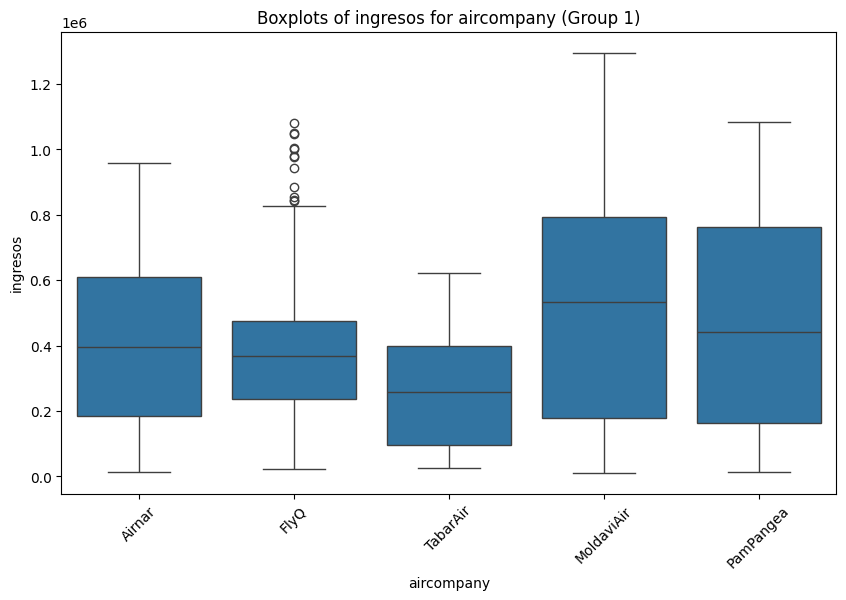

In [63]:
plot_grouped_boxplots(df_air_jun, "aircompany", "ingresos")

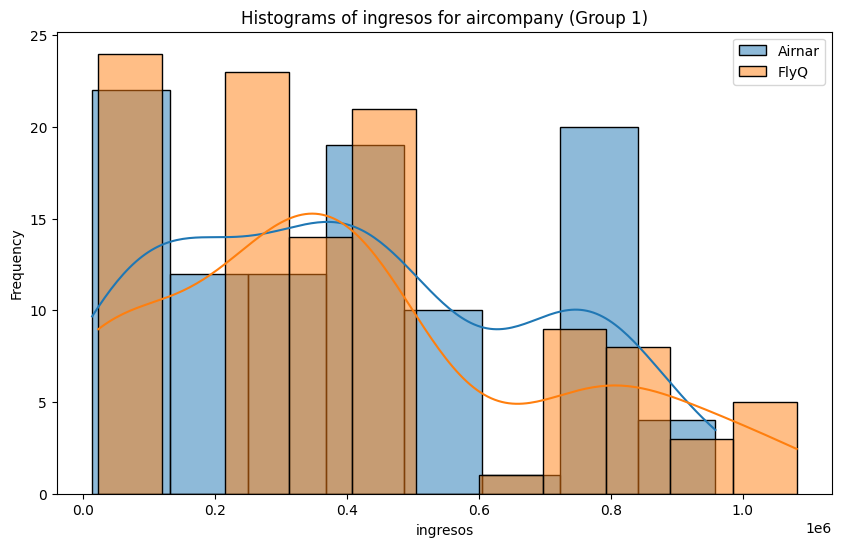

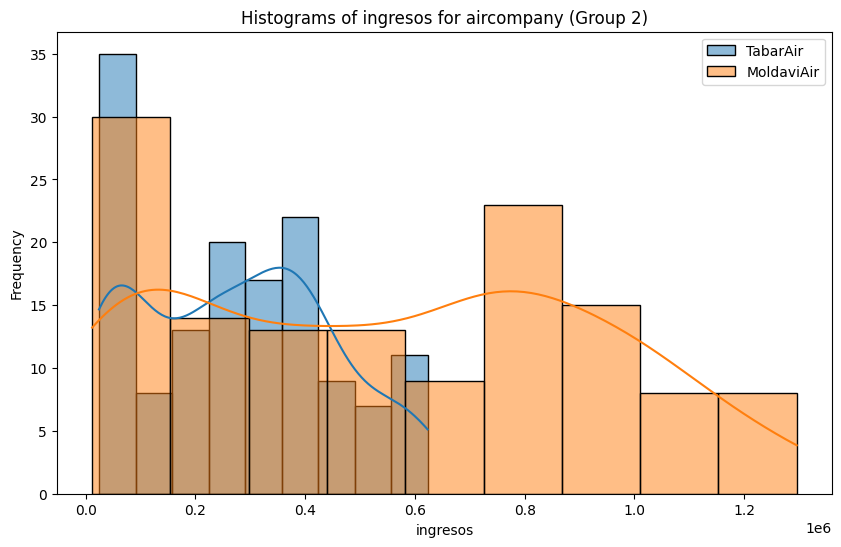

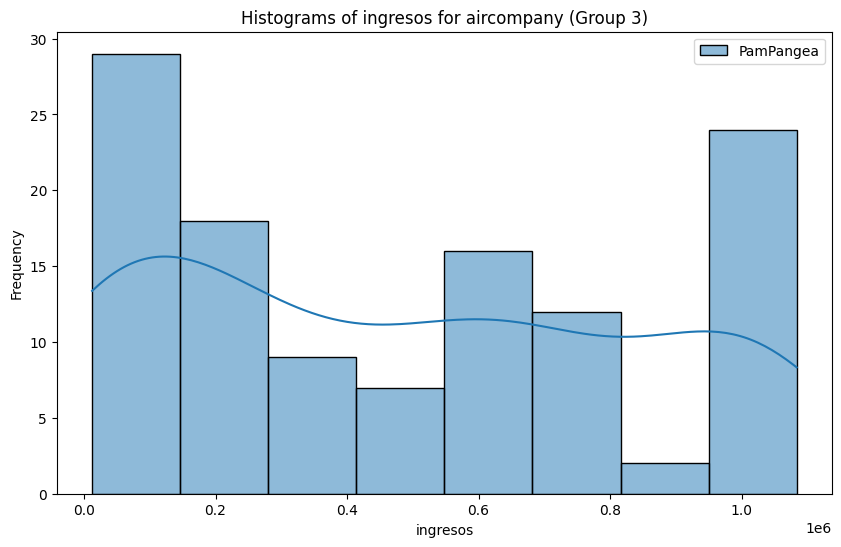

In [64]:
plot_grouped_histograms(df_air_jun, "aircompany", "ingresos", 2)

Veíamos que somo la compañía con más vuelos pero con el menor rango de ingresos, no tenemos ninguno de ingresos muy altos, habrá que ver si nuestros vuelos son más eficientes. Por otro lado, nos pareció interesante que Airnar fuese la compañía que menos vuela y tuviese la 3 mayor mediana. Vemos que tiene varios picos de ingresos relativamente altos, habrá que ver qué están haciendo bien.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


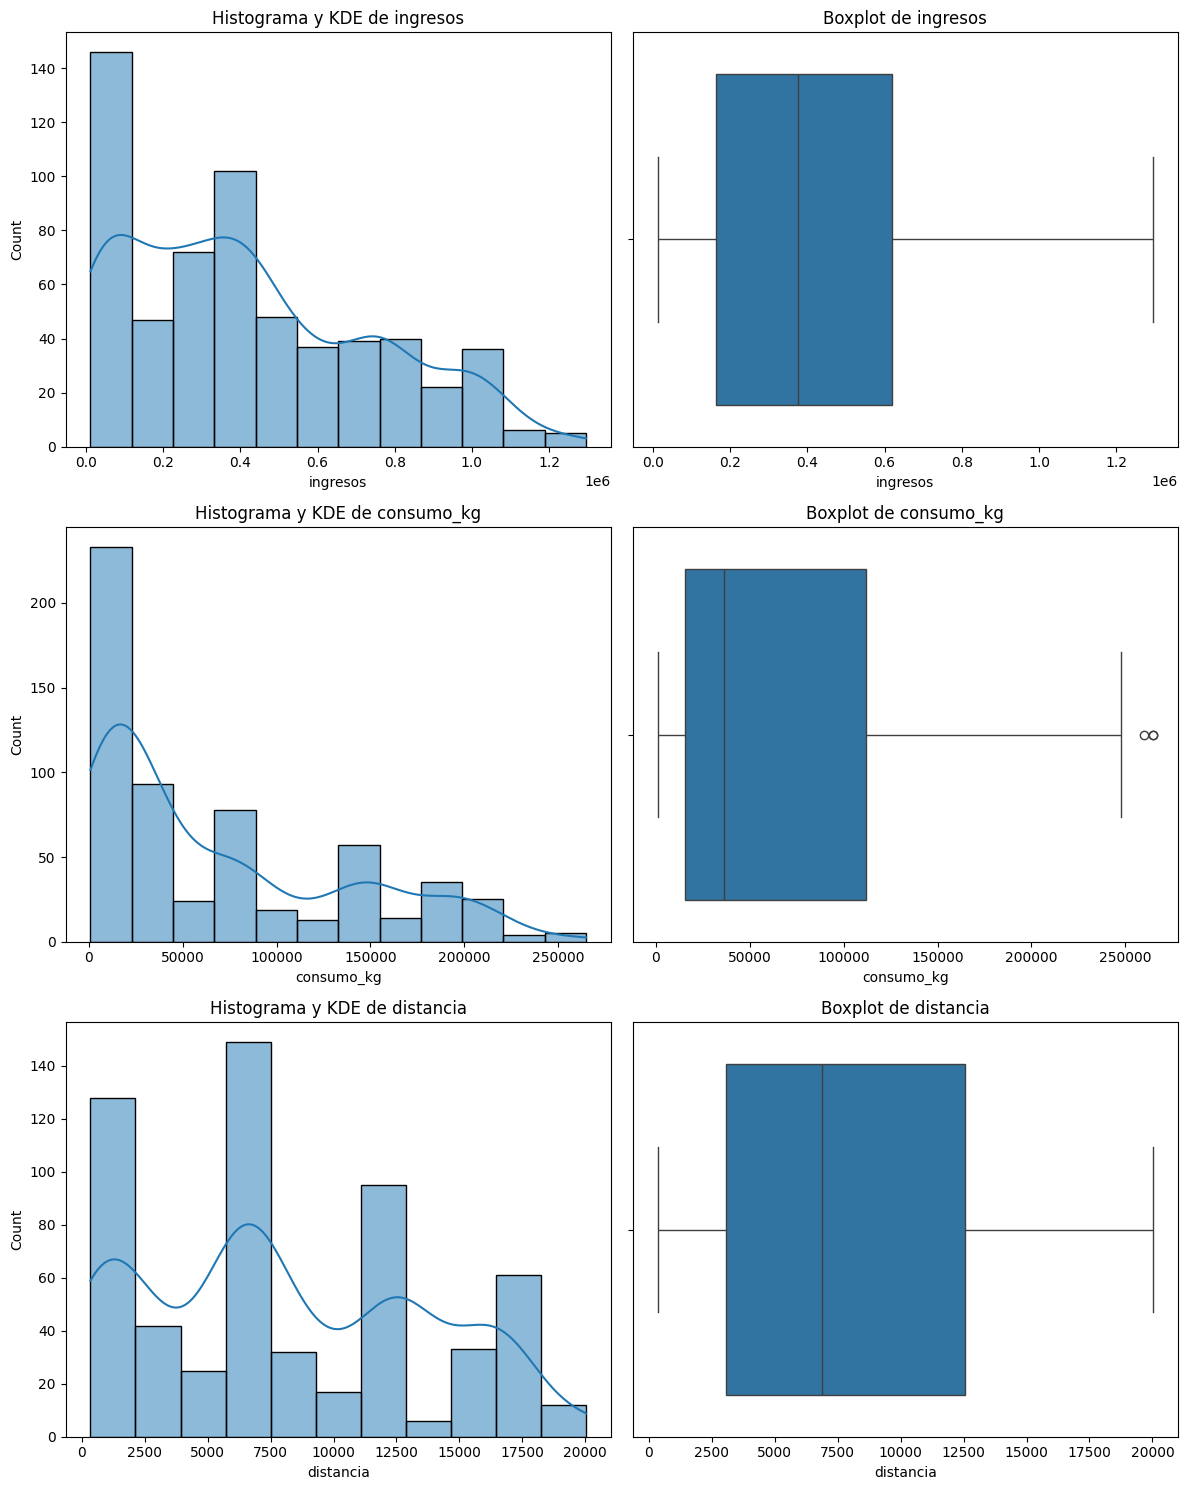

In [65]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

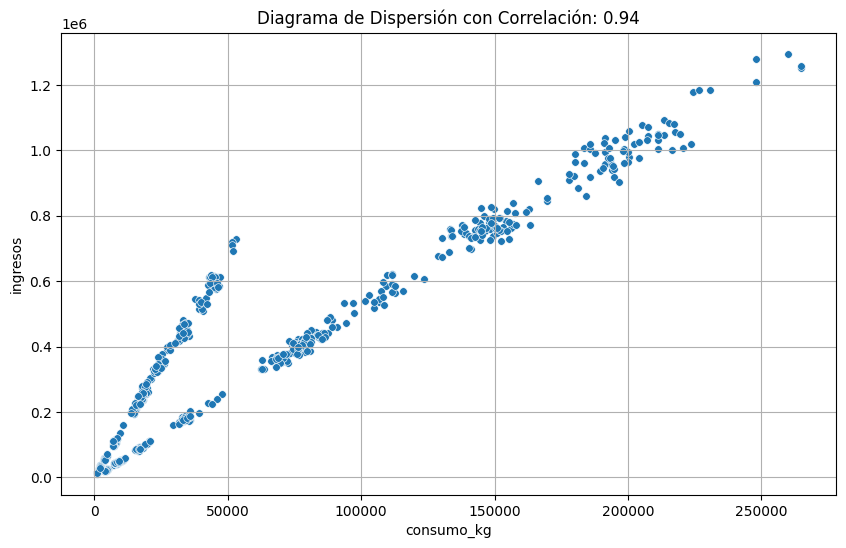

In [66]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

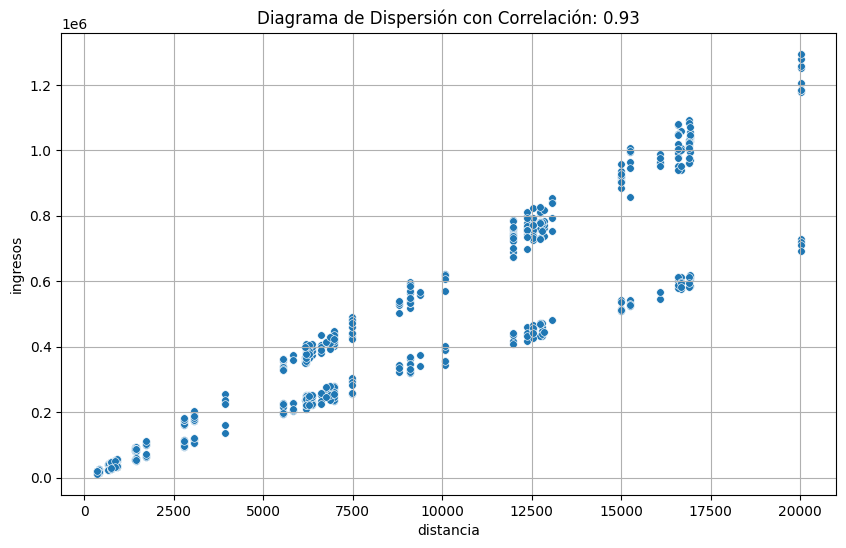

In [67]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

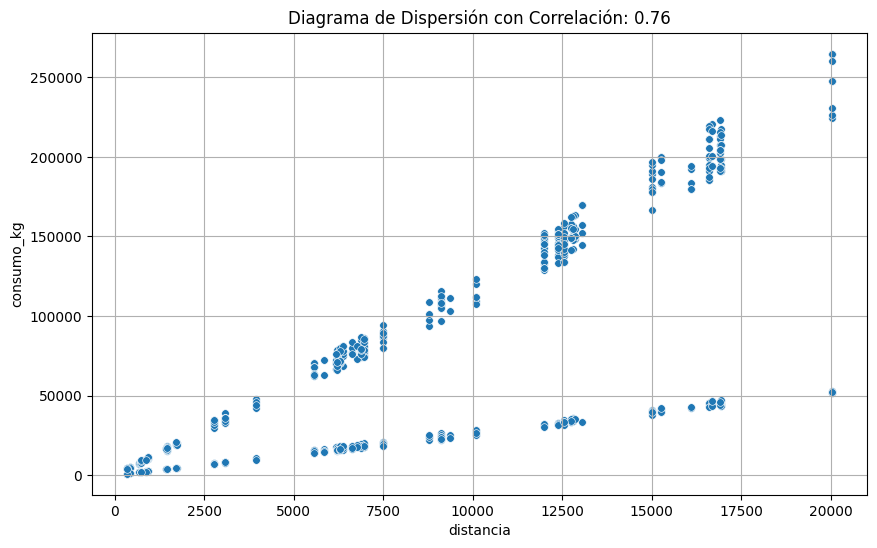

In [68]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

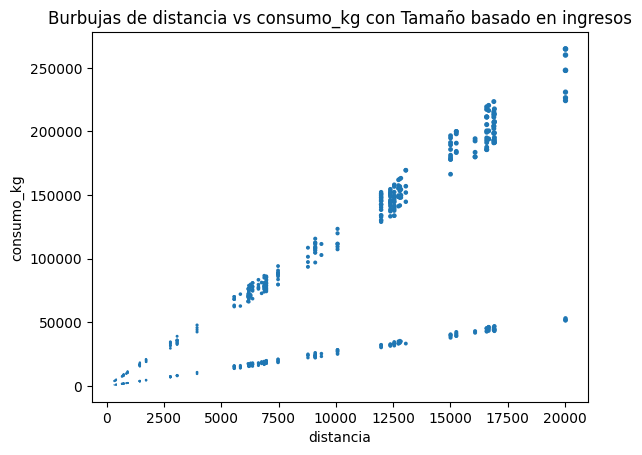

In [73]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 150000)

Aquí observábamos que las tres variables tenían una correlación directa positiva, en el análisis bivariante veíamos en todos los gráficos de puntos que había dos líneas y que siempre había una que era claramente más eficiente que la otra (siempre también la que menor número de vuelos tenía).Observando el gráfico de burbujas vemos que hay una línea en la que hay vuelos de todas las distancias con un consumo mucho menor que la otra línea, siempre por debajo de los 5000 kg de combustible, pero con unos ingresos similares, nos interesan los vuelos que están en esa línea.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [74]:
df_air_jun["cat_vuelo"] = 1
df_air_jun.loc[(df_air_jun["distancia"] >= 5000) & (df_air_jun["distancia"] <10500), "cat_vuelo"] = 2
df_air_jun.loc[(df_air_jun["distancia"] >= 10500) & (df_air_jun["distancia"] <14500), "cat_vuelo"] = 3
df_air_jun.loc[(df_air_jun["distancia"] >= 14500), "cat_vuelo"] = 4

In [76]:
df_air_jun.cat_vuelo.value_counts()

cat_vuelo
2    217
1    176
4    106
3    101
Name: count, dtype: int64

In [77]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor, [col_2,col_1]]

Respuesta 1:


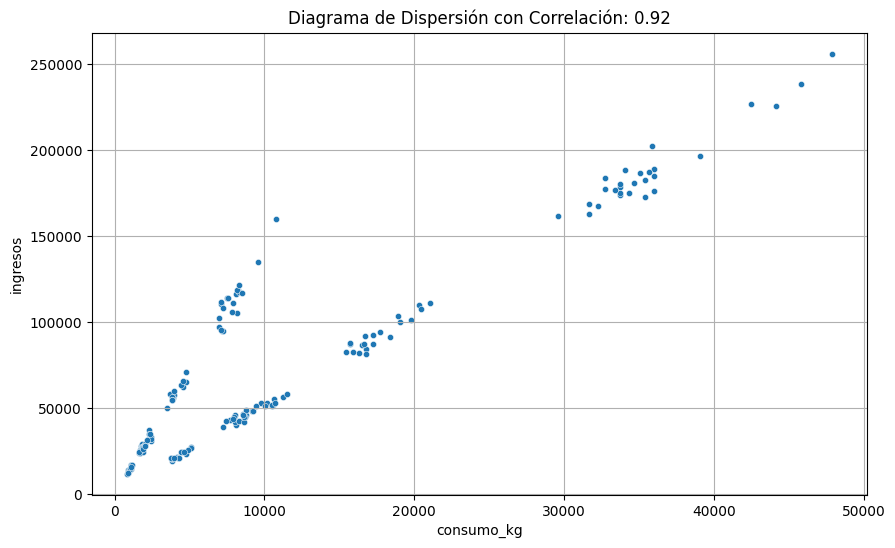

Respuesta 3:


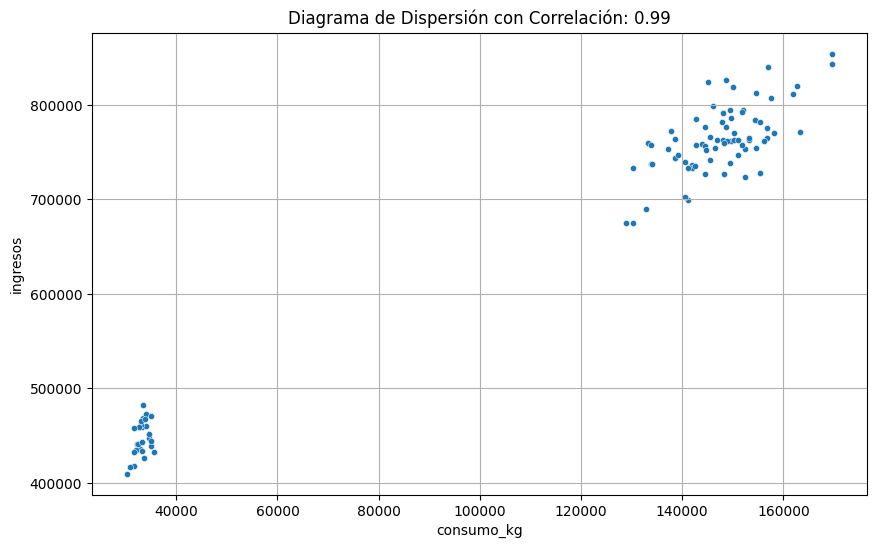

Respuesta 2:


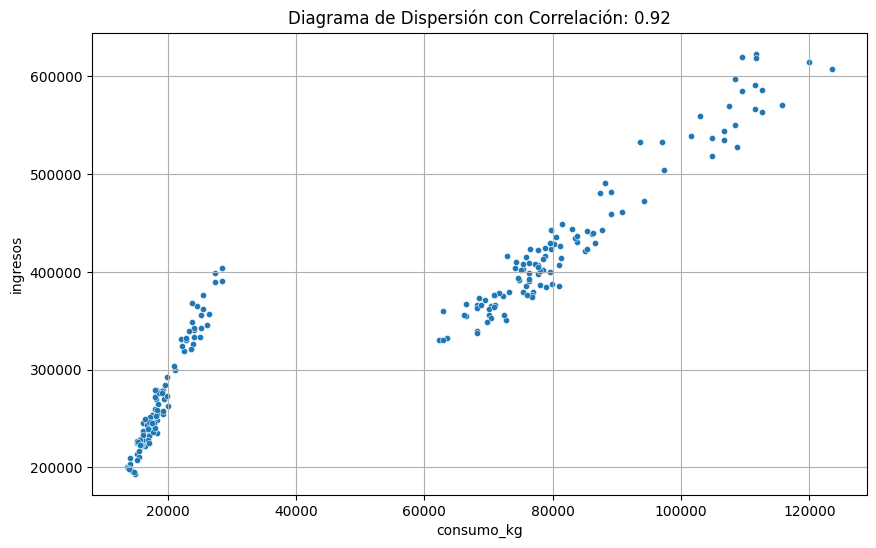

Respuesta 4:


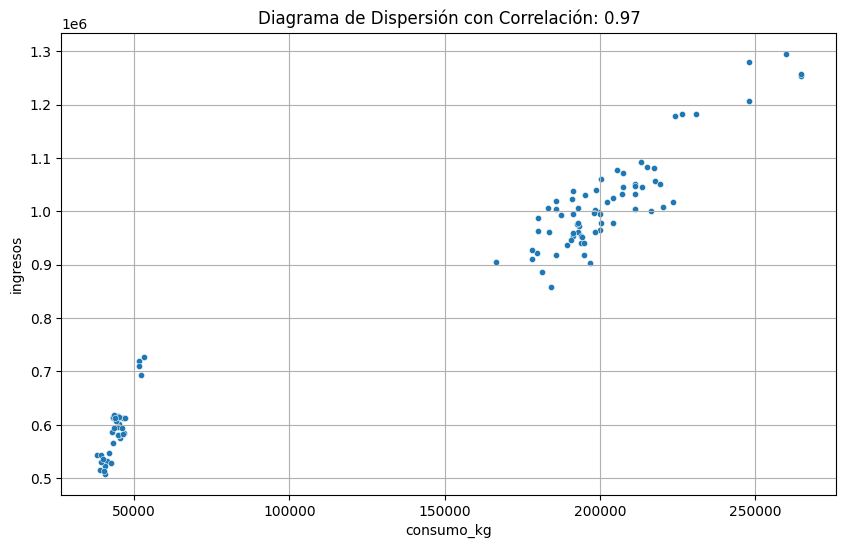

In [78]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

Sobre todo resultan interesantes los grupos 1 y 3 de distancias, ya que encontramos vuelos con un consumo mucho menor que otros pero con ingresos similares. En el grupo 1 nos interesan los que tienen unos ingresos ente 33000-41000 y ver por qué unos tienen un consumo mucho menor que otros. En el grupo 3 nos interesa el tramo incial de consumo, más o menos hasta los 10000 kg. En los grupos 2 y 4, incluso más en el 2 que en el 4, encontramos vuelos con un consumo menor, pero unos ingresos mucho menores que el consumo. Quizá alguna parte del 4 podría ser interesante también pero a priori no parece.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.